# Exploratory Data Analysis (EDA)

In [58]:
import pandas as pd
import numpy as np

## VIEW TABLE

In [59]:
df_retail = pd.read_csv('/kaggle/input/retail-sales/retail_sales.csv')
df_retail.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [60]:
import datetime
df_retail['Date'] = pd.to_datetime(df_retail['Date'])
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


## Descriptive Statistics: Calculate basic statistics (mean, median, mode, standard deviation)

In [61]:
df_retail.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [62]:
mode_values = df_retail.mode().iloc[0]
mode_values

Transaction ID                        1
Date                2023-05-16 00:00:00
Customer ID                     CUST001
Gender                           Female
Age                                43.0
Product Category               Clothing
Quantity                            4.0
Price per Unit                     50.0
Total Amount                       50.0
Name: 0, dtype: object

## Time Series Analysis: Analyze sales trends over time using time series techniques.

In [63]:
# Aggregating sales data by date
sales_data = df_retail.groupby('Date')['Total Amount'].sum().reset_index()

# Setting the Date column as the index
sales_data.set_index('Date', inplace=True)
sales_data = sales_data.asfreq('D')

# Filling missing values if any (e.g., with 0)
sales_data = sales_data.fillna(0)


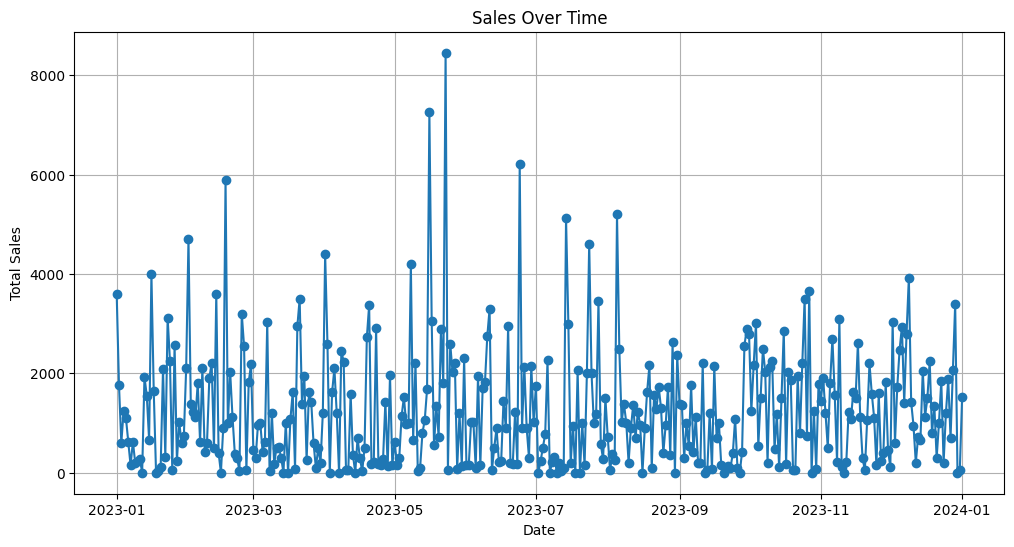

In [64]:
import matplotlib.pyplot as plt

# Plotting the sales data
plt.figure(figsize=(12, 6))
plt.plot(sales_data, marker='o')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

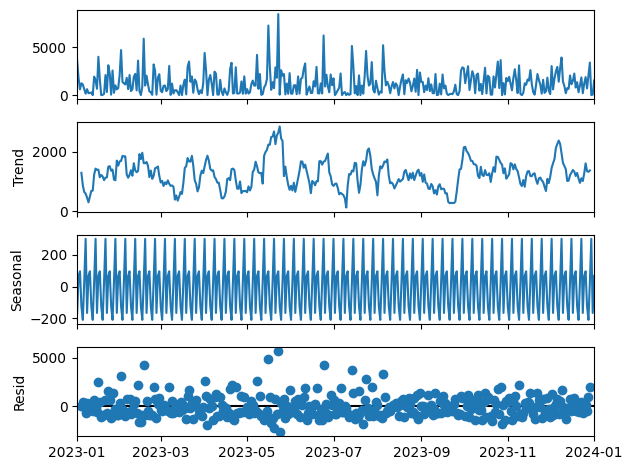

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the time series
decomposition = seasonal_decompose(sales_data, model='additive', period=7)
decomposition.plot()
plt.show()


                               SARIMAX Results                                
Dep. Variable:           Total Amount   No. Observations:                  366
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3114.547
Date:                Mon, 05 Aug 2024   AIC                           6235.094
Time:                        21:52:07   BIC                           6246.793
Sample:                    01-01-2023   HQIC                          6239.743
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0467      0.054      0.857      0.391      -0.060       0.153
ma.L1         -1.0000      0.039    -25.675      0.000      -1.076      -0.924
sigma2      1.492e+06   2.62e-08   5.69e+13      0.0

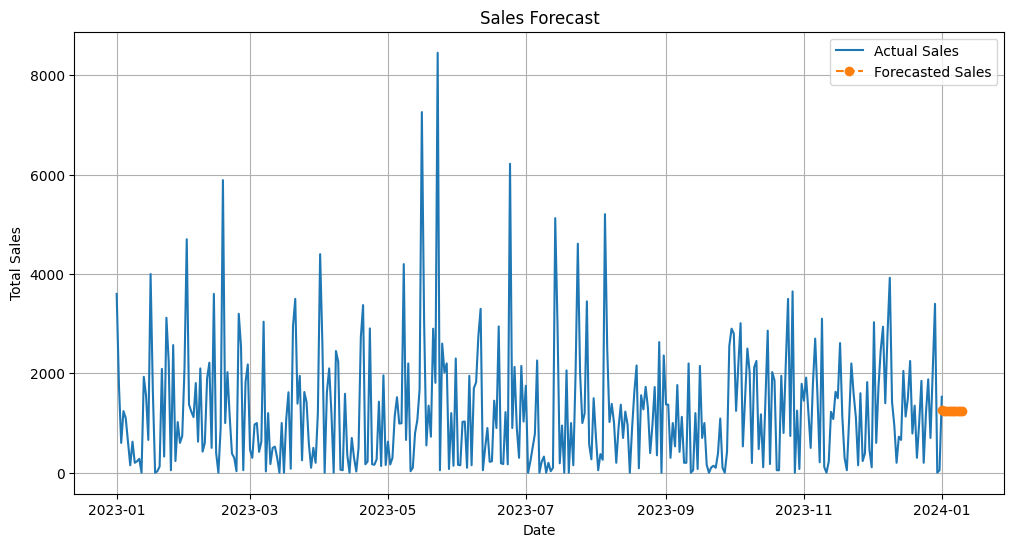

In [66]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fitting the ARIMA model
model = ARIMA(sales_data, order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecasting future sales
forecast = model_fit.forecast(steps=10)
forecast_dates = pd.date_range(start=sales_data.index[-1], periods=10, freq='D')

# Printing the forecasted values
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted Sales': forecast})
print(forecast_df)

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(sales_data, label='Actual Sales')
plt.plot(forecast_dates, forecast, label='Forecasted Sales', linestyle='--', marker='o')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()


In [67]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(sales_data, model_fit.fittedvalues))
print(f'RMSE: {rmse}')


RMSE: 1240.4623156820396


## Customer and Product Analysis: Analyze customer demographics and purchasing behavior.

### Gender Distribution

Gender
Female    510
Male      490
Name: count, dtype: int64


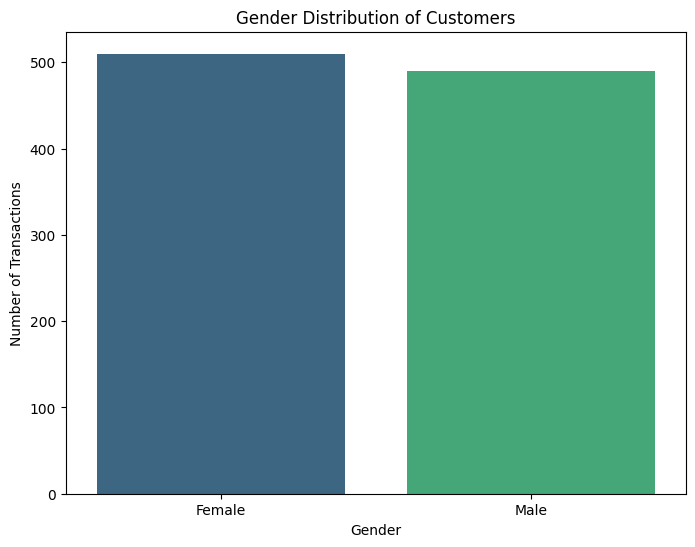

In [68]:
import seaborn as sns
# Gender distribution
gender_counts = df_retail['Gender'].value_counts()
print(gender_counts)
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.show()


#### Purchasing behavior of Each Gender

Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64


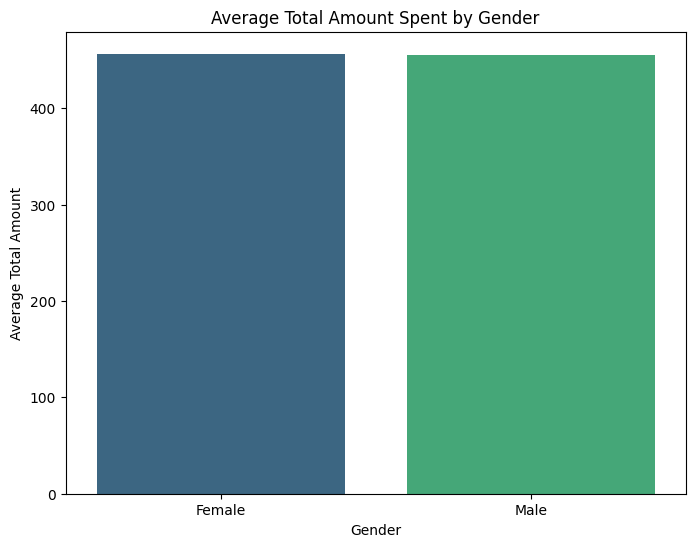

In [69]:

# Average total amount spent by gender
avg_total_amount = df_retail.groupby('Gender')['Total Amount'].mean()
print(avg_total_amount)
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_total_amount.index, y=avg_total_amount.values, palette='viridis')
plt.title('Average Total Amount Spent by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Total Amount')
plt.show()

Gender
Female    2.545098
Male      2.481633
Name: Quantity, dtype: float64


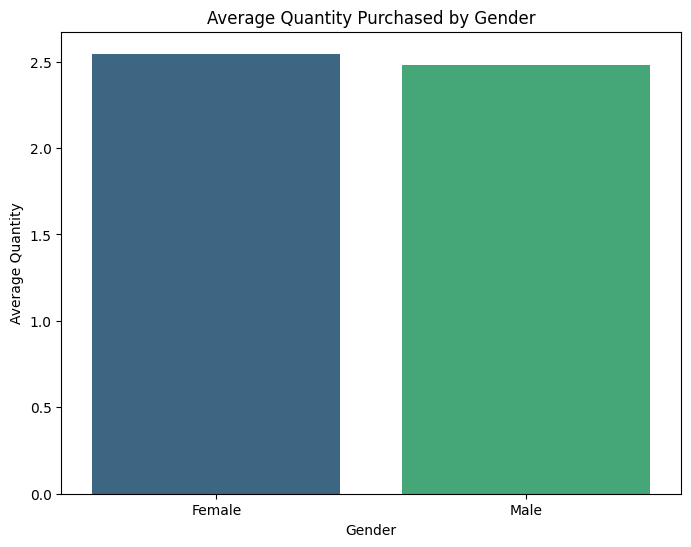

In [70]:
# Average quantity purchased by gender
avg_quantity = df_retail.groupby('Gender')['Quantity'].mean()
print(avg_quantity)
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_quantity.index, y=avg_quantity.values, palette='viridis')
plt.title('Average Quantity Purchased by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Quantity')
plt.show()

### Age Distribution

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


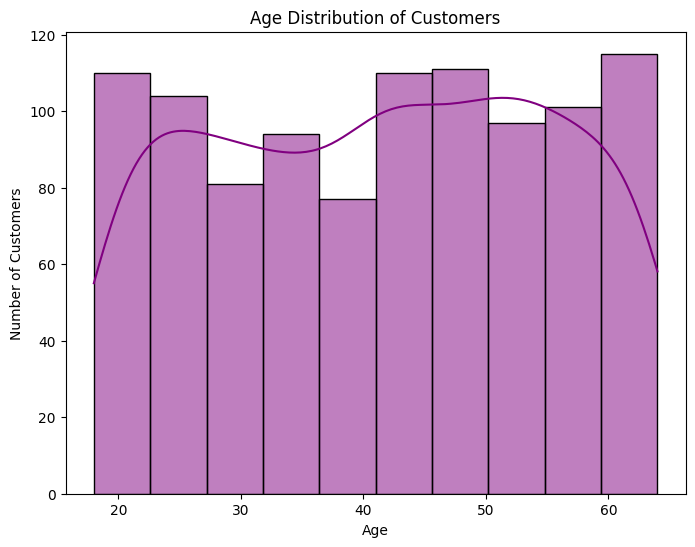

In [71]:
# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_retail['Age'], bins=10, kde=True, color='purple')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()


##### Product category by age group

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


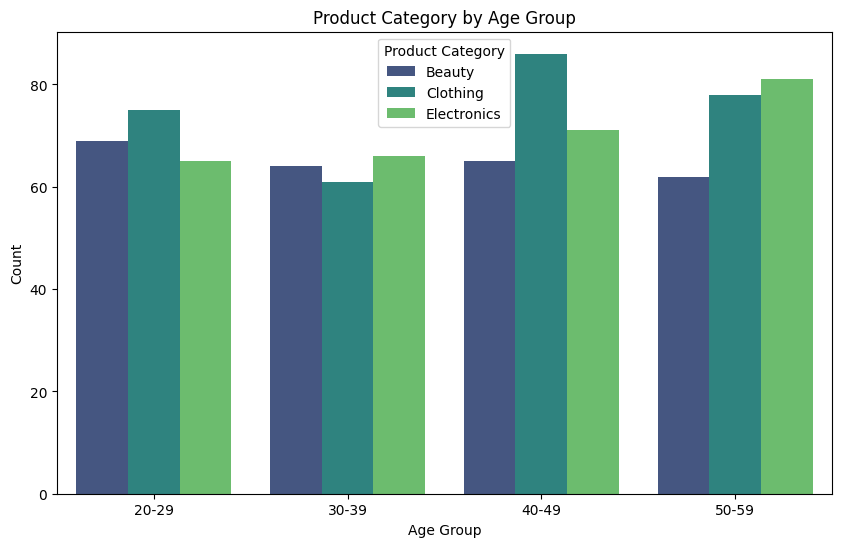

In [72]:
# Bin ages into groups
bins = [20, 30, 40, 50, 60]
labels = ['20-29', '30-39', '40-49', '50-59']
df_retail['Age Group'] = pd.cut(df_retail['Age'], bins=bins, labels=labels, right=False)

# Product category by age group
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', hue='Product Category', data=df_retail, palette='viridis')
plt.title('Product Category by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


#### Average transaction value by age group

  Age Group  Total Amount
0     20-29    464.449761
1     30-39    504.319372
2     40-49    420.563063
3     50-59    444.977376


/tmp/ipykernel_33/2599499775.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_transaction_value = df_retail.groupby('Age Group')['Total Amount'].mean().reset_index()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


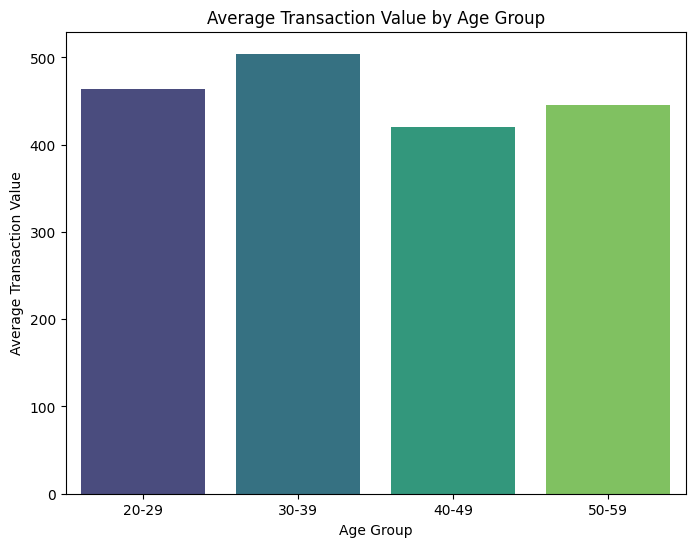

In [73]:
# Average transaction value by age group
avg_transaction_value = df_retail.groupby('Age Group')['Total Amount'].mean().reset_index()
print(avg_transaction_value)
plt.figure(figsize=(8, 6))
sns.barplot(x='Age Group', y='Total Amount', data=avg_transaction_value, palette='viridis')
plt.title('Average Transaction Value by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Transaction Value')
plt.show()

### Purchasing Behavior

/tmp/ipykernel_33/2680712072.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_purchases = df_retail.resample('M').size()


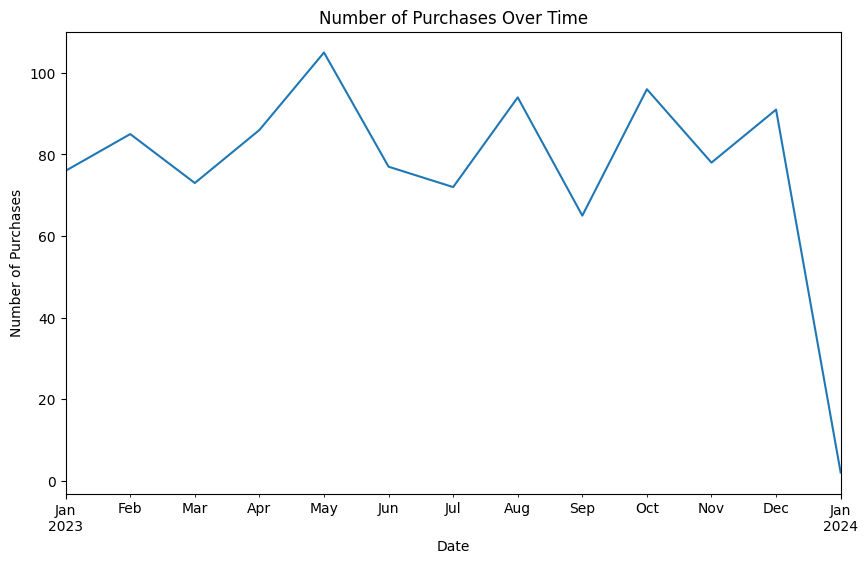

In [74]:
# Analyze purchase trends over time
df_retail.set_index('Date', inplace=True)
monthly_purchases = df_retail.resample('M').size()

plt.figure(figsize=(10, 6))
monthly_purchases.plot()
plt.title('Number of Purchases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.show()

### Product Categories

  Product Category  Count
0         Clothing    351
1      Electronics    342
2           Beauty    307


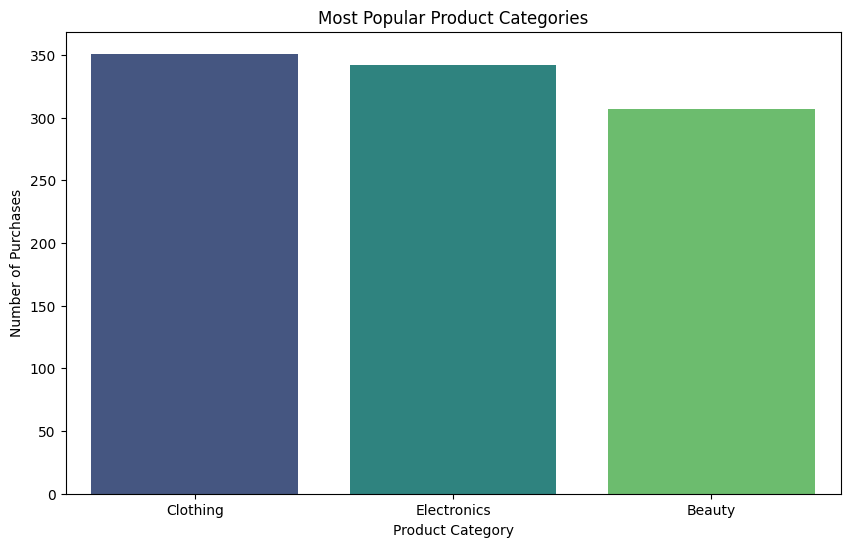

In [77]:
# Popular product categories
product_category_counts = df_retail['Product Category'].value_counts().reset_index()
product_category_counts.columns = ['Product Category', 'Count']
print(product_category_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Count', data=product_category_counts, palette='viridis')
plt.title('Most Popular Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.show()

#### Product preferences by gender

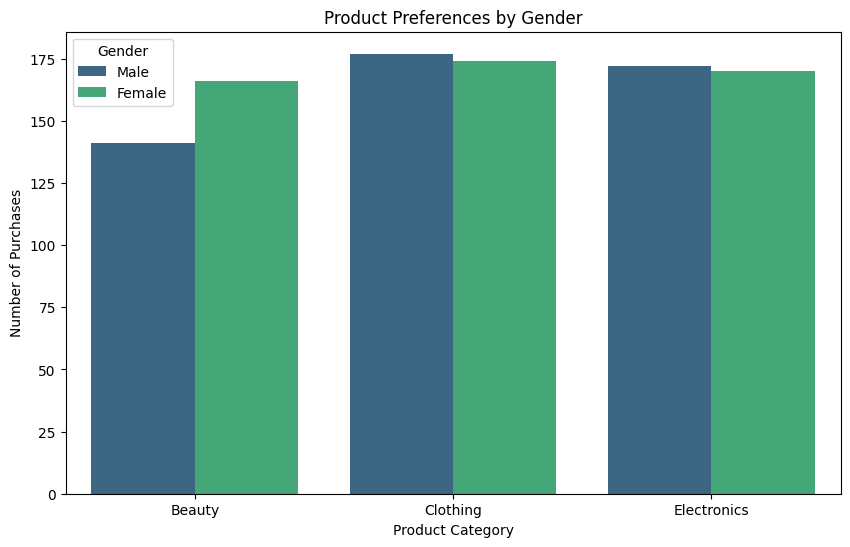

In [78]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Product Category', hue='Gender', data=df_retail, palette='viridis')
plt.title('Product Preferences by Gender')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.show()

#### Product preferences by age group

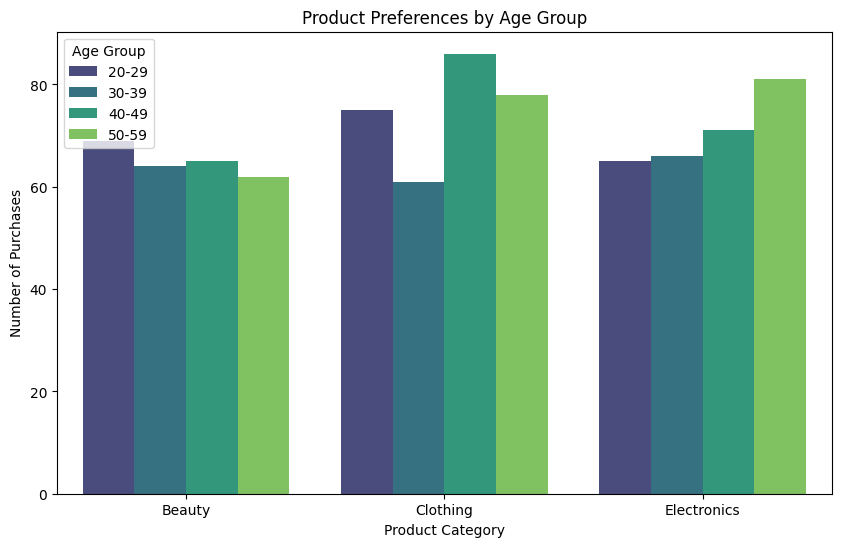

In [80]:
# Bin ages into groups
bins = [20, 30, 40, 50, 60]
labels = ['20-29', '30-39', '40-49', '50-59']
df_retail['Age Group'] = pd.cut(df_retail['Age'], bins=bins, labels=labels, right=False)

# Product preferences by age group
plt.figure(figsize=(10, 6))
sns.countplot(x='Product Category', hue='Age Group', data=df_retail, palette='viridis')
plt.title('Product Preferences by Age Group')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.show()

#### Identify High-Spending Customers or VIPs

In [81]:
# Total spending per customer
total_spending_per_customer = df_retail.groupby('Customer ID')['Total Amount'].sum()

# Define a threshold for high-spending customers (e.g., top 20% spenders)
threshold = total_spending_per_customer.quantile(0.8)  # 80th percentile

# High-spending (VIP) customers
vip_customers = total_spending_per_customer[total_spending_per_customer > threshold]

print("High-Spending Customers:\n", vip_customers)


High-Spending Customers:
 Customer ID
CUST013    1500
CUST015    2000
CUST016    1500
CUST031    1200
CUST046    1200
           ... 
CUST942    1500
CUST943    1200
CUST946    2000
CUST956    1500
CUST970    2000
Name: Total Amount, Length: 153, dtype: int64


#### Define Repeat Buyers

In [82]:
# Count of transactions per customer
customer_transaction_counts = df_retail['Customer ID'].value_counts()

# Identify repeat buyers (customers with more than 1 transaction)
repeat_buyers = customer_transaction_counts[customer_transaction_counts > 1].count()
total_customers = customer_transaction_counts.count()

# Percentage of repeat buyers
percentage_repeat_buyers = (repeat_buyers / total_customers) * 100

print("Percentage of Repeat Buyers:", percentage_repeat_buyers, "%")


Percentage of Repeat Buyers: 0.0 %


Based on the exploratory data analysis (EDA), here are actionable recommendations to optimize sales and improve customer engagement:

### 1. Target High-Spending Age Groups

**Recommendation**: 
- **Focus Marketing Efforts**: The age groups 20-29 and 30-39 have the highest average transaction values. Tailor marketing campaigns to these age groups, highlighting products that match their preferences.
- **Promotions and Discounts**: Offer special promotions or discounts on popular products for these age groups to drive sales and enhance loyalty.

**Action Steps**:
- Create targeted ads and content focused on popular products among these age groups.
- Develop exclusive offers or loyalty rewards for customers in these age ranges.

### 2. Enhance Product Offerings by Category

**Recommendation**:
- **Stock and Display**: Increase inventory and visibility for high-demand product categories such as Clothing and Electronics, which have the highest purchase counts.
- **Focus on Trends**: For Beauty products, which are popular among females, ensure that the latest trends and bestsellers are well-stocked and promoted.

**Action Steps**:
- Analyze sales data to identify the best-selling items within these categories and optimize inventory levels.
- Use promotions and in-store displays to highlight these popular products.

### 3. Improve Engagement with Gender-Based Insights

**Recommendation**:
- **Tailor Offers**: Although spending is similar between genders, women purchase more Beauty products and men prefer Clothing and Electronics. Tailor product recommendations and promotional offers based on these preferences.
- **Gender-Specific Campaigns**: Develop campaigns that cater to the specific interests and purchasing behaviors of each gender.

**Action Steps**:
- Launch marketing campaigns featuring Beauty products for female customers and Clothing/Electronics for male customers.
- Use targeted email marketing and personalized recommendations to engage each gender effectively.

### 4. Address Seasonal and Temporal Trends

**Recommendation**:
- **Optimize Inventory for Peak Times**: With the highest purchases in May, focus on stock levels and promotions leading up to and during this period.
- **Plan Campaigns Around High-Purchase Months**: Use the data from April-June to plan special events, sales, or new product launches.

**Action Steps**:
- Increase marketing efforts and stock levels in the months leading up to May.
- Plan seasonal promotions and events during these high-purchase months.

### 5. Target Product Preferences by Age Group

**Recommendation**:
- **Customized Offers**: For age groups 40-49 (Clothing) and 50-59 (Electronics), create tailored offers that match their purchasing habits.
- **Age-Specific Promotions**: Develop specific promotions or discounts on product categories that are popular among these age groups.

**Action Steps**:
- Segment marketing campaigns and product offers based on age groups to improve relevance and appeal.
- Use customer data to personalize product recommendations and promotional messages.

### 6. Analyze and Improve Quantity Purchased

**Recommendation**:
- **Encourage Larger Purchases**: Given that males buy slightly more Clothing and Electronics and females buy Beauty products, consider strategies to encourage higher quantities per purchase.
- **Bundle Offers**: Create bundle offers or volume discounts to increase the quantity of products purchased.

**Action Steps**:
- Implement promotions that incentivize buying in larger quantities, such as discounts on multi-packs or bundled products.
- Analyze purchase patterns to identify opportunities for cross-selling and upselling.

### Summary

1. **Target Age Groups**: Focus on marketing and promotions for high-spending age groups.
2. **Optimize Product Offerings**: Increase inventory and visibility for popular product categories.
3. **Gender-Based Marketing**: Tailor offers and campaigns based on gender preferences.
4. **Seasonal Planning**: Prepare for peak purchase times and plan promotions accordingly.
5. **Age-Specific Offers**: Develop promotions based on age group preferences.
6. **Encourage Larger Purchases**: Use bundling and discounts to increase the quantity of products purchased.

Implementing these recommendations can help drive sales, enhance customer satisfaction, and improve overall business performance.